In [1]:
# Importing necessary libraries for machine learning and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

In [2]:
# Loading in and filtering to only have conference games
df = pd.read_csv('big12-22.csv')
df = df.loc[df['Custom'] == 'Big 12']
print(df.columns)

Index(['Rk', 'Date', 'Team', 'H/A', 'Opponent', 'Result', 'Win/Loss',
       'Team Points', 'Opponent Points', 'Passing_Cmp', 'Passing_Att',
       'Passing_Pct', 'Passing_Yds', 'Passing_TD', 'Rushing_Att',
       'Rushing_Yds', 'Rushing_Avg', 'Rushing_TD', 'Total Offense_Plays',
       'Total Offense_Yds', 'Total Offense_Avg', 'First Downs_Pass',
       'First Downs_Rush', 'First Downs_Pen', 'First Downs_Tot',
       'Penalties_No.', 'Penalties_Yds', 'Turnovers_Fum', 'Turnovers_Int',
       'Turnovers_Tot', 'Season', 'Custom', 'WINS', 'Losses'],
      dtype='object')


In [3]:
# Splitting up the data into training and testing sets
testing = df.loc[df['Season'] >= 2020]
train = df.loc[df['Season'] < 2020]

# Making sure there is a proper amount of data in both training and testing data
print(train.shape)
print(testing.shape)

(726, 34)
(272, 34)


In [4]:
# Creating two lists to hold the predictor numerical variables and the target classification variable
pred = ['Passing_Cmp', 'Passing_Att',
       'Passing_Pct', 'Passing_Yds', 'Passing_TD', 'Rushing_Att',
       'Rushing_Yds', 'Rushing_Avg', 'Rushing_TD', 'Total Offense_Plays',
       'Total Offense_Yds', 'Total Offense_Avg', 'First Downs_Pass',
       'First Downs_Rush', 'First Downs_Pen', 'First Downs_Tot',
       'Penalties_No.', 'Penalties_Yds', 'Turnovers_Fum', 'Turnovers_Int',
       'Turnovers_Tot',]
target = ['Win/Loss']

In [5]:
# Creating training predictors, training target, testing predictors, and testing target dataframes.
train_pred = train[pred]
train_target = train[target]
test_pred = testing[pred]
test_target = testing[target]

In [6]:
# Specify and fit Decision Tree Classifier with random_state to guarantee reproducibilty
# and specifiy max depth so the tree is not 10 levels deep with over 100 different nodes
dct_md = DecisionTreeClassifier(random_state=22, max_depth=3)
dct_md.fit(train_pred, train_target)

# Below code from following github inspired by https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb
export_graphviz(
                dct_md,
                out_file='tre.dot',
                feature_names=train_pred.columns,
                class_names=['L','W'],
                rounded=True,
                filled=True
                )
!dot -Tpng tre.dot -o tre.png

In [7]:
# Specify and fit Random Forest Classifier with random_state to guaranteee reproducibilty
rcf = RandomForestClassifier(random_state=22)
rcf.fit(train_pred, train_target)

print(accuracy_score(test_target, rcf.predict(test_pred)))

<ipython-input-7-bd161fd6090a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rcf.fit(train_pred, train_target)


0.7463235294117647


In [8]:
# Set up empty Data Frame
f_impt = pd.DataFrame()

# Create a feature columnn and a feature importance column
f_impt['feature'] = pred
f_impt['importance'] = rcf.feature_importances_

# Sort the values by importance
f_impt = f_impt.sort_values('importance', ascending=False)
print(f_impt)

                feature  importance
2           Passing_Pct    0.100239
11    Total Offense_Avg    0.095742
6           Rushing_Yds    0.093700
10    Total Offense_Yds    0.071847
1           Passing_Att    0.064488
5           Rushing_Att    0.058833
7           Rushing_Avg    0.052583
20        Turnovers_Tot    0.047461
8            Rushing_TD    0.042732
13     First Downs_Rush    0.041545
3           Passing_Yds    0.040734
0           Passing_Cmp    0.035836
17        Penalties_Yds    0.034764
9   Total Offense_Plays    0.034587
15      First Downs_Tot    0.033996
12     First Downs_Pass    0.032617
14      First Downs_Pen    0.028827
4            Passing_TD    0.025079
16        Penalties_No.    0.024441
19        Turnovers_Int    0.023646
18        Turnovers_Fum    0.016301


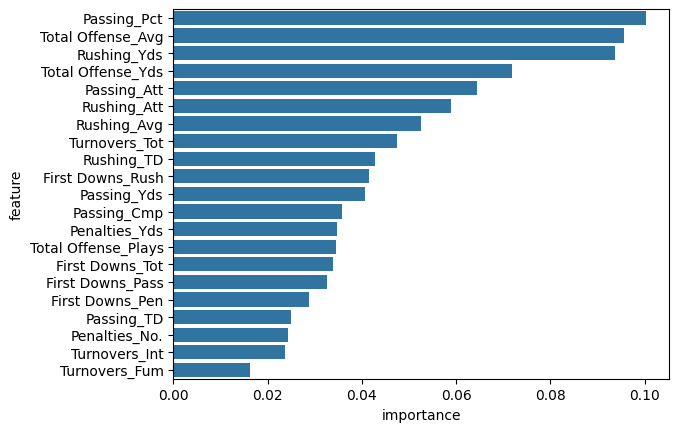

In [9]:
# Create barplot of feature importance for each feature.
sns.barplot(x='importance', y='feature', data=f_impt)
plt.show()

In [10]:
f_impt.to_csv('feature_importance.csv')

In [11]:
title_game = df.loc[(df['Season'] == 2022) & (df['Rk'] == 13)]

In [12]:
title_game

,Rk,Date,Team,H/A,Opponent,Result,Win/Loss,Team Points,Opponent Points,Passing_Cmp,...,First Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Season,Custom,WINS,Losses
562,13,12/3/2022 0:00,Kansas State,N,TCU,W (31-28),W,31,28,18,...,20,4,40,1,0,1,2022,Big 12,1,0
1240,13,12/3/2022 0:00,TCU,N,Kansas State,L (28-31),L,28,31,18,...,18,4,45,1,1,2,2022,Big 12,0,1
